In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


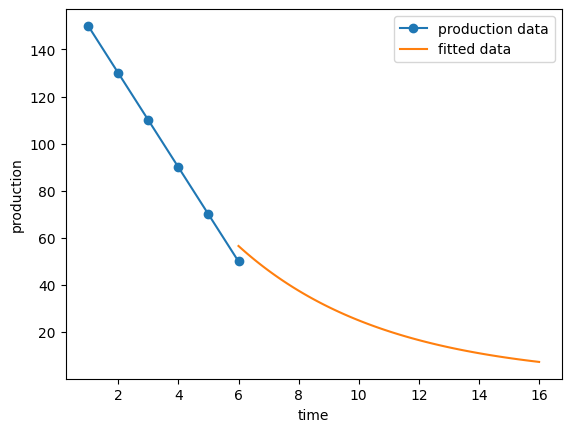

In [4]:
#Exponential decline curve
def exponential_decline(production_data):
  time= np.array(production_data['time'])
  production= np.array(production_data['production'])
  p= np.polyfit(time, np.log(production), 1, w=np.sqrt(production))
  future_time= np.linspace(time[-1], time[-1]+10, 100)
  future_production= np.exp(p[1])*np.exp(p[0]*future_time)

  plt.plot(time, production, marker='o', label= 'production data')
  plt.plot(future_time, future_production, marker=' ', label= 'fitted data')
  plt.xlabel('time')
  plt.ylabel('production')
  plt.legend()
  plt.show()

#example
production_data= {'time': [1,2,3,4,5,6], 'production': [150,130, 110, 90, 70, 50]}
exponential_decline(production_data)

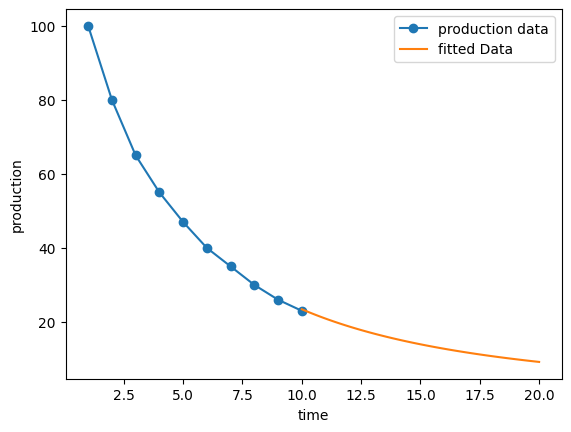

In [5]:
#Hyperbolic Decline
from scipy.optimize import curve_fit
def hyperbolic_decline(t, qi, b, di):
  return qi/((1+b*di*t))**(1/b)

production_data= {'time': [1,2,3,4,5,6,7,8,9,10], 'production': [100,80, 65,55,47,40,35,30,26,23]}
time= np.array(production_data['time'])
production= np.array(production_data['production'])
c, covariance= curve_fit(hyperbolic_decline, time, production, p0=[100,0.5,0.1])
qi, b, di= c

future_time= np.linspace(time[-1], time[-1]+10, 100)
future_production= hyperbolic_decline(future_time, qi, b,di)

plt.plot(time, production, marker='o', label= 'production data')
plt.plot(future_time, future_production, marker=' ', label= 'fitted Data')
plt.xlabel('time')
plt.ylabel('production')
plt.legend()
plt.show()

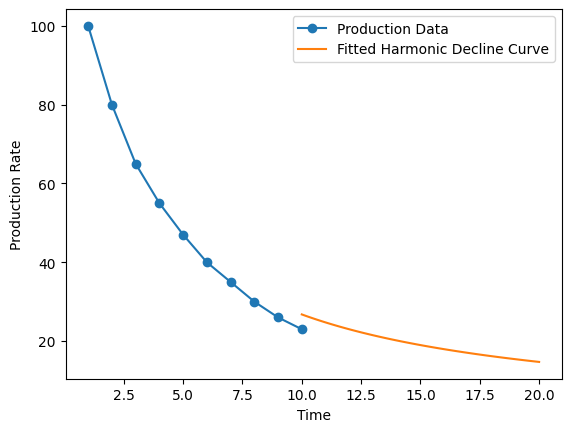

In [10]:
# Harmonic decline function

def harmonic_decline(t, qi, di):
    return qi / (1 + di * t)

production_data = {'time': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),'production': np.array([100, 80, 65, 55, 47, 40, 35, 30, 26, 23])}

time = production_data['time']
production = production_data['production']

c, cov = curve_fit(harmonic_decline, time, production, p0=[100, 0.1])
qi, di = c

future_time = np.linspace(time[-1], time[-1] + 10, 100)
future_production = harmonic_decline(future_time, qi, di)

plt.plot(time, production, marker='o', label='Production Data')
plt.plot(future_time, future_production, marker=' ', label='Fitted Harmonic Decline Curve')
plt.xlabel('Time')
plt.ylabel('Production Rate')
plt.legend()
plt.show()
